In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ex1data1.txt',names =['x','y'])

In [3]:
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
def scale (col):
    maxVal =np.amax(col)
    minVal =np.amin(col)
    
    diff =maxVal-minVal
    
    if diff==0:
        diff =maxVal
    
    for i in range(col.size):
        col[i] =col[i]/diff
        
    return col

In [5]:
for column in df:
    df[column] =scale(df[column])

In [14]:
def gradientDescent(x, y, theta, iterations, alpha):
    past_cost =[]
    past_theta =[theta]
    m =y.size
    
    for i in range(iterations):
        prediction =x.dot(theta)
        error =prediction -y
        cost =1.0/(2*m)*((error.T).dot(error))
        theta =theta -alpha*1.0/m*((x.T).dot(error))
        past_theta.append(theta)
        past_cost.append(cost)
        
    return past_theta,past_cost    

In [7]:
np.random.seed(127)
df.insert(0, "aug", np.ones(len(df)), True)

In [12]:
theta =np.random.rand(df.shape[1]-1)
iterations =2000
alpha =0.01

In [15]:
past_thetas, past_costs = gradientDescent(df.iloc[:, :2], df.iloc[:,2], theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: -0.03, 0.53


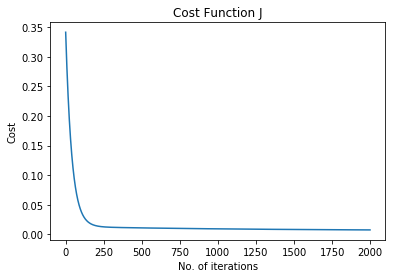

In [22]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

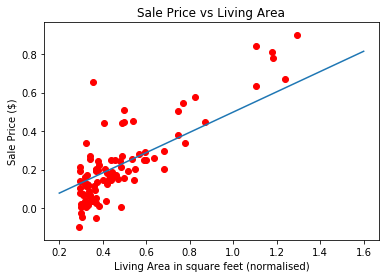

In [55]:
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(df.iloc[:,1], df.iloc[:,2], color='red')
x = np.linspace(0.2, 1.6, 100)
y = theta[1]*x + theta[0]
plt.plot(x, y)
plt.show()